In [1]:
import csv
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict, Counter
import numpy as np
import math

In [4]:
# id,title,url,score,time,comments,author

with open('data.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

data = [d for d in data if d['title'].startswith('Show HN')]

In [94]:
# data = [d for d in data if int(d['score']) > 100] # outliers

data = [d for d in data if d['title'].startswith('Show HN')]

# print(len(data))


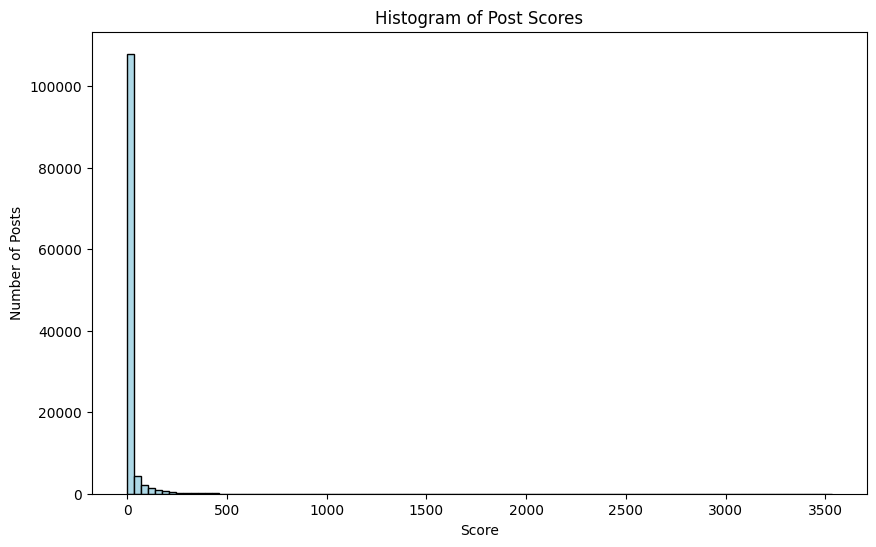

In [5]:
scores = [int(item['score']) for item in data]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=100, color='lightblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Posts')
plt.title('Histogram of Post Scores')
plt.show()

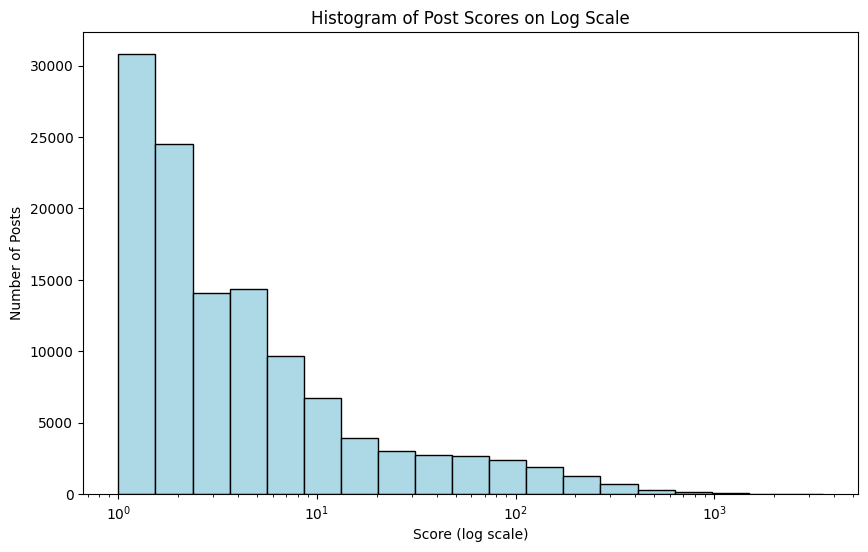

In [6]:
scores = [int(item['score']) for item in data if int(item['score']) > 0]

# Plotting the histogram with a log scale for scores
plt.figure(figsize=(10, 6))
# Using log=True on the x-axis
plt.hist(scores, bins=np.logspace(np.log10(min(scores)), np.log10(max(scores)), 20), color='lightblue', edgecolor='black')
plt.gca().set_xscale("log")  # Set x-axis to log scale
plt.xlabel('Score (log scale)')
plt.ylabel('Number of Posts')
plt.title('Histogram of Post Scores on Log Scale')
plt.show()

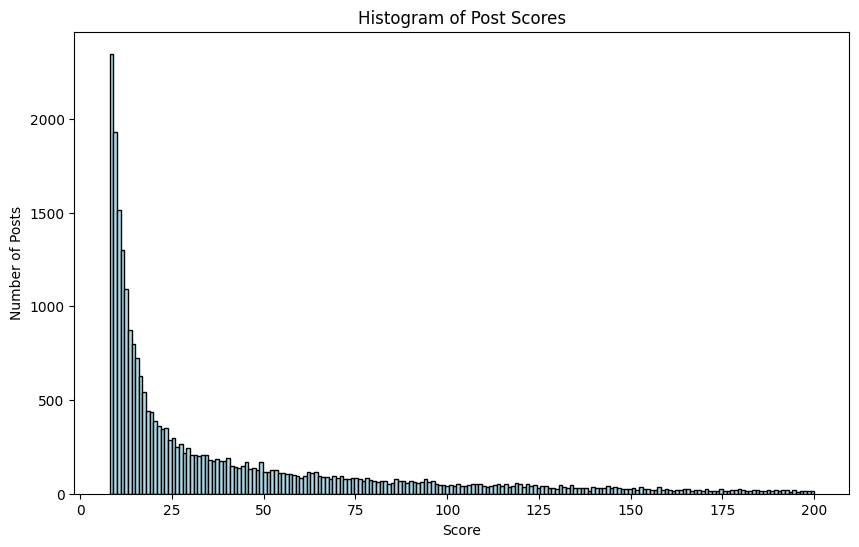

In [97]:
scores = [int(item['score']) for item in data]
scores = [s for s in scores if s >= 8 and s <= 200]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=len(Counter(scores)), color='lightblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Posts')
plt.title('Histogram of Post Scores')
plt.show()

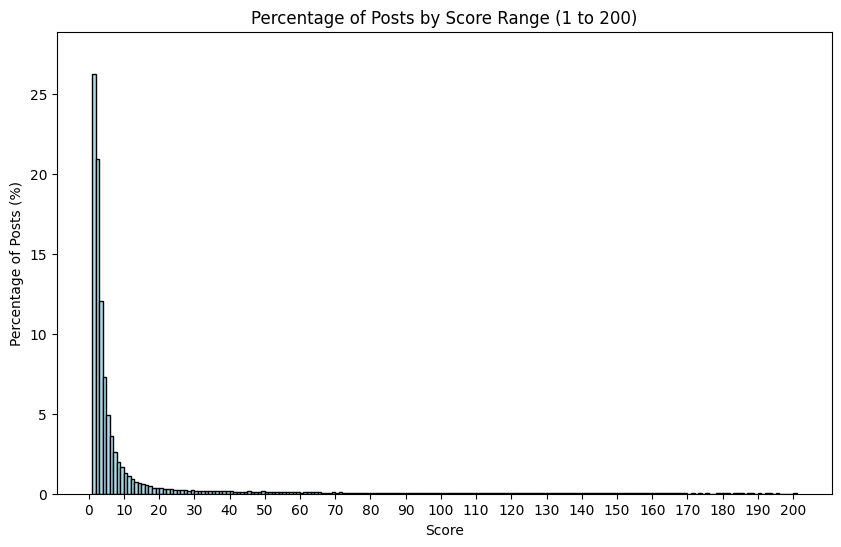

In [99]:
# Filter scores from the dataset: more than 0 and up to 200
scores = [int(item['score']) for item in data if 0 < int(item['score']) <= 200]

# Determine the total number of considered posts for percentage calculation
total_posts = len(scores)

# Plotting the histogram
plt.figure(figsize=(10, 6))
# Create histogram with score ranges, normalize=True to get the density instead of counts
counts, bins, patches = plt.hist(scores, bins=range(1, 202), density=True, color='lightblue', edgecolor='black')

# Convert density (percentage of total) to percentage
percentages = [100 * count for count in counts]

# Adjusting the patches' height to represent percentages
for patch, percentage in zip(patches, percentages):
    patch.set_height(percentage)

# Adjust y-axis to reflect the percentage scale
plt.ylim(0, max(percentages) * 1.1)  # Add some space above the tallest bar

plt.xlabel('Score')
plt.ylabel('Percentage of Posts (%)')
plt.title('Percentage of Posts by Score Range (1 to 200)')
plt.xticks(range(0, 201, 10))  # Setting x-ticks for better readability
plt.show()

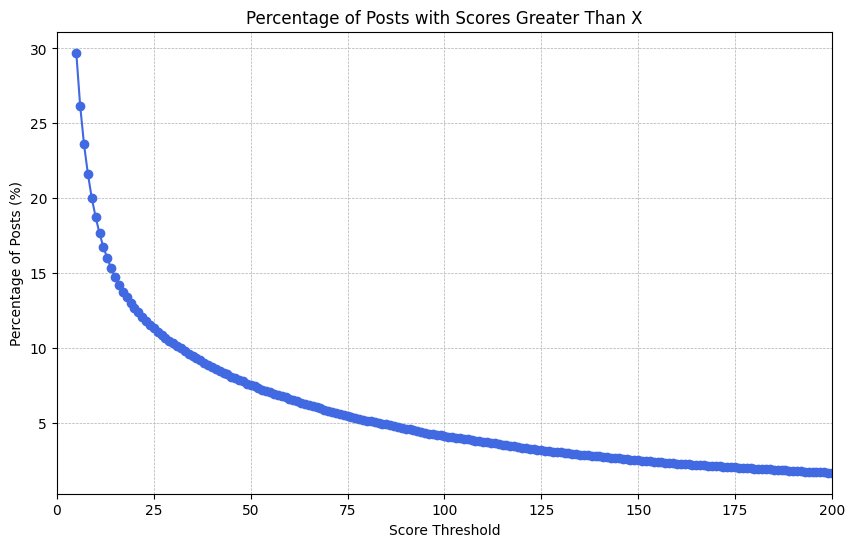

In [100]:
scores = [int(item['score']) for item in data]

# Initialize a list to hold the percentage of posts with more than X scores
percentages = []

total_posts = len(scores)  # Total number of posts
for score_threshold in range(5, 201):  # 0 to 200
    # Count posts with more than the current score_threshold
    count = sum(score > score_threshold for score in scores)
    # Calculate percentage
    percentage = (count / total_posts) * 100
    percentages.append(percentage)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(5, 201), percentages, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Score Threshold')
plt.ylabel('Percentage of Posts (%)')
plt.title('Percentage of Posts with Scores Greater Than X')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(0, 200)  # Limit x-axis to match the range of scores we're analyzing
plt.show()

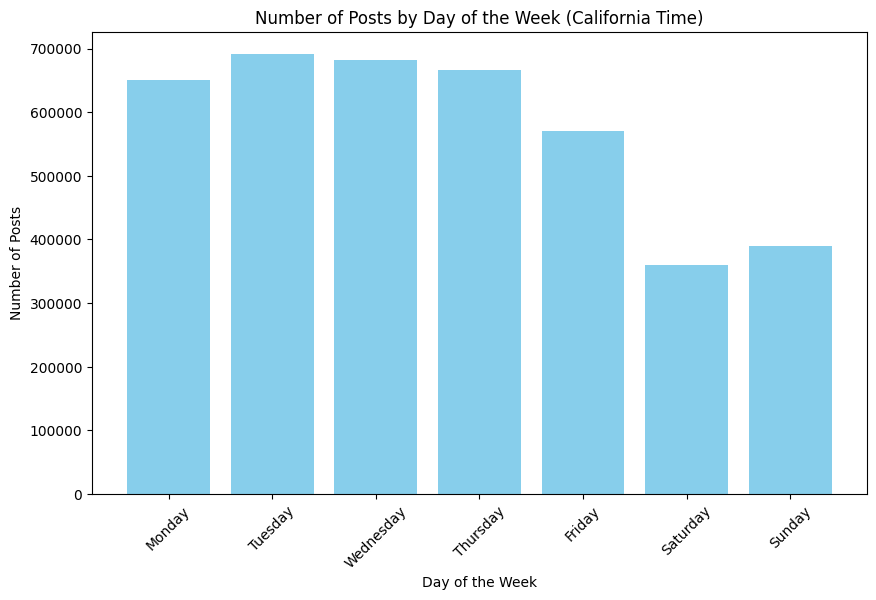

In [103]:
# Load data from CSV
with open('data.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

# Convert time to California timezone and count posts per day of the week
posts_by_weekday = Counter()  # To store the count of posts by weekday
for item in data:
    # Convert Unix timestamp to datetime in California timezone
    timestamp = datetime.fromtimestamp(int(item['time']), tz=pytz.utc).astimezone(pytz.timezone('America/Los_Angeles'))
    weekday = timestamp.strftime('%A')  # Get the full weekday name
    posts_by_weekday[weekday] += 1

# Sort counts by the order in the week starting from Monday
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
posts_sorted = {day: posts_by_weekday[day] for day in sorted_days if day in posts_by_weekday}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(posts_sorted.keys(), posts_sorted.values(), color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.title('Number of Posts by Day of the Week (California Time)')
plt.xticks(rotation=45)
plt.show()

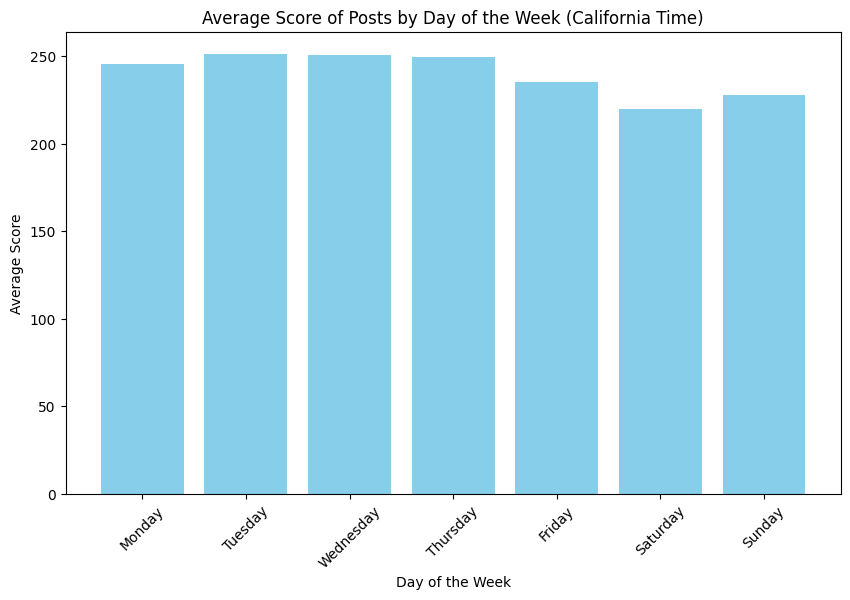

In [50]:
scores_by_weekday = defaultdict(list)  # To store scores by weekday
for item in data:
    # Convert Unix timestamp to datetime in California timezone
    timestamp = datetime.fromtimestamp(int(item['time']), tz=pytz.utc).astimezone(pytz.timezone('America/Los_Angeles'))
    weekday = timestamp.strftime('%A')  # Get the full weekday name
    scores_by_weekday[weekday].append(int(item['score']))

# Calculate average score for each weekday
avg_scores = {day: sum(scores)/len(scores) for day, scores in scores_by_weekday.items()}

# Sort days by the order in the week starting from Monday
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_scores_sorted = {day: avg_scores[day] for day in sorted_days if day in avg_scores}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_scores_sorted.keys(), avg_scores_sorted.values(), color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Score')
plt.title('Average Score of Posts by Day of the Week (California Time)')
plt.xticks(rotation=45)
plt.show()

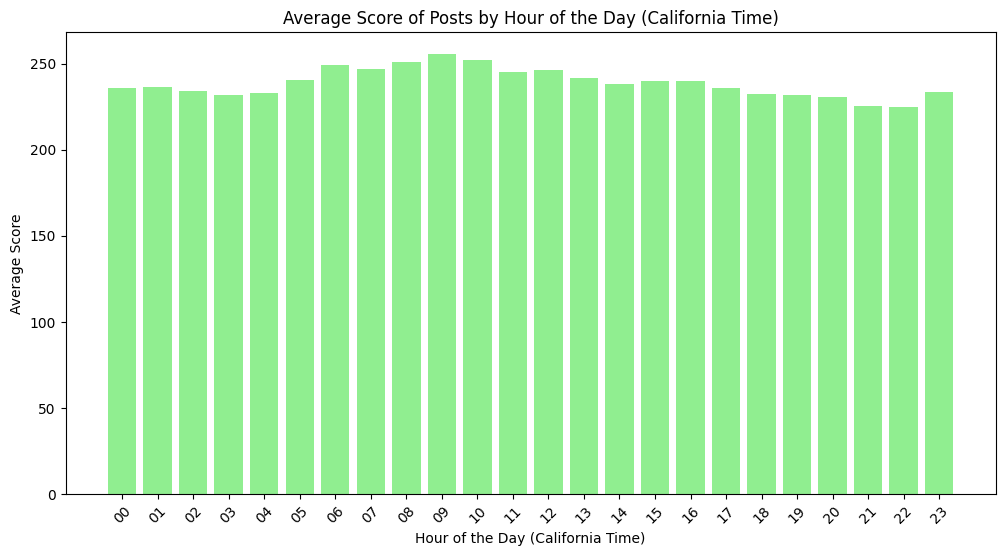

In [43]:
# Convert time to California timezone and calculate average score for each hour
scores_by_hour = defaultdict(list)  # To store scores by hour
for item in data:
    # Convert Unix timestamp to datetime in California timezone
    timestamp = datetime.fromtimestamp(int(item['time']), tz=pytz.utc).astimezone(pytz.timezone('America/Los_Angeles'))
    hour = timestamp.strftime('%H')  # Get the hour
    scores_by_hour[hour].append(int(item['score']))

# Calculate average score for each hour
avg_scores = {hour: sum(scores)/len(scores) for hour, scores in scores_by_hour.items()}

# Sort hours
sorted_hours = sorted(avg_scores.keys())
avg_scores_sorted = {hour: avg_scores[hour] for hour in sorted_hours}

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(avg_scores_sorted.keys(), avg_scores_sorted.values(), color='lightgreen')
plt.xlabel('Hour of the Day (California Time)')
plt.ylabel('Average Score')
plt.title('Average Score of Posts by Hour of the Day (California Time)')
plt.xticks(rotation=45)
plt.show()

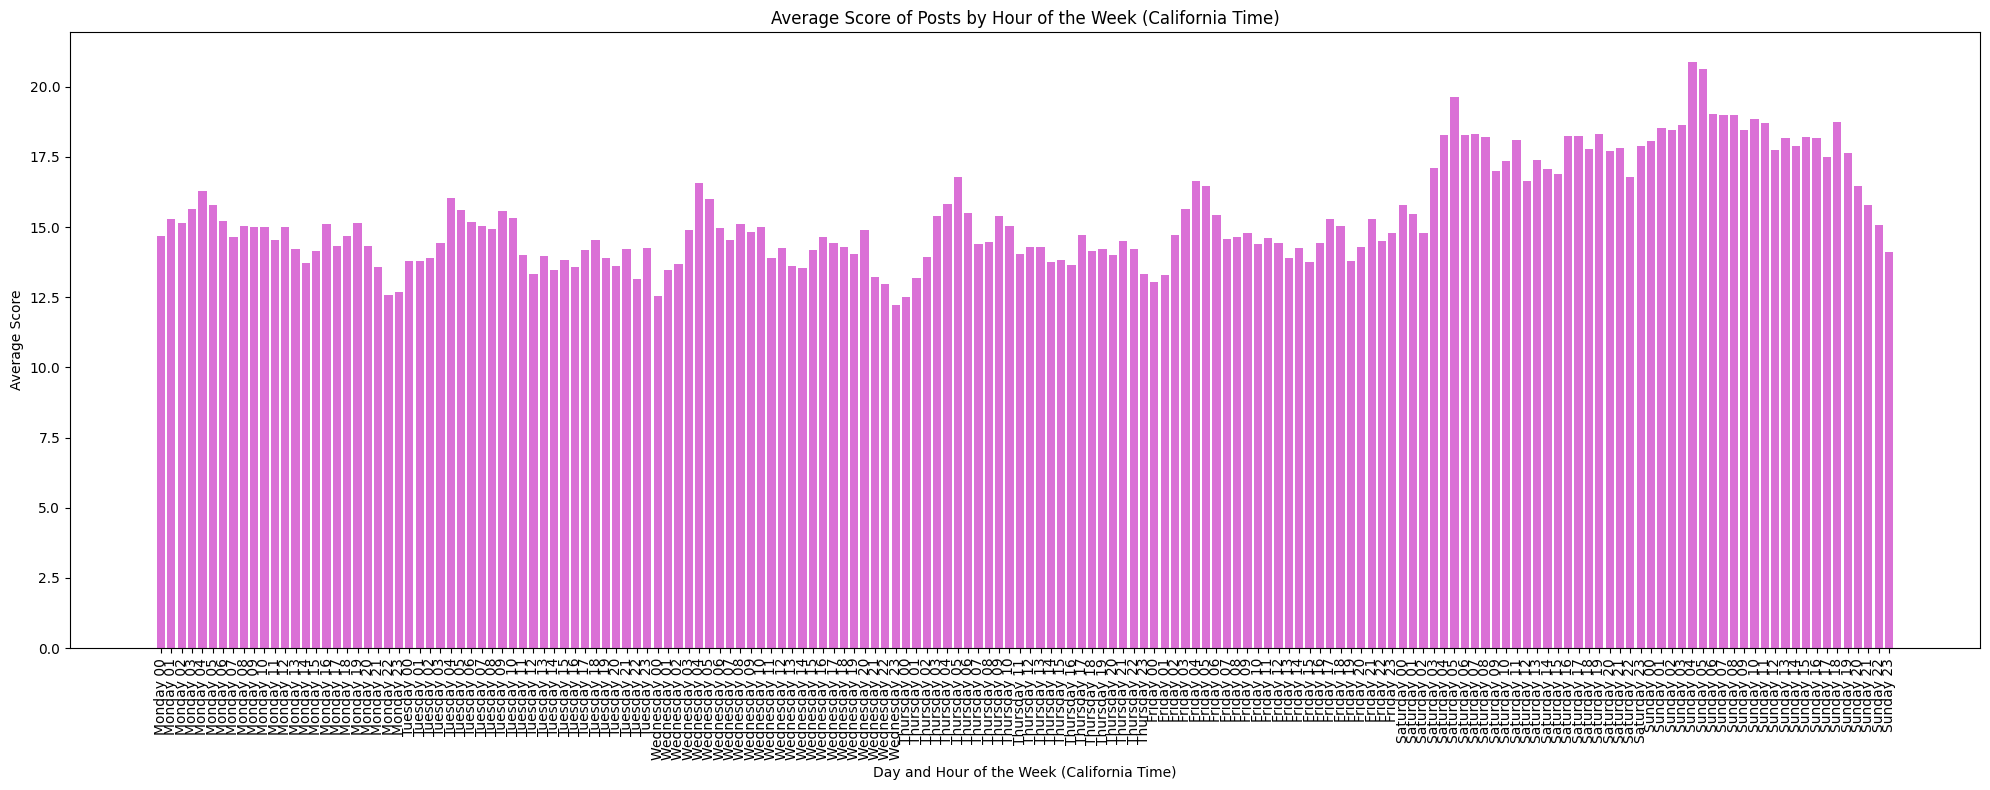

In [26]:
# Convert time to California timezone and calculate average score for each hour of the week
scores_by_hour_of_week = defaultdict(list)  # To store scores by hour of the week
for item in data:
    # Convert Unix timestamp to datetime in California timezone
    timestamp = datetime.fromtimestamp(int(item['time']), tz=pytz.utc).astimezone(pytz.timezone('America/Los_Angeles'))
    weekday_hour = timestamp.strftime('%A %H')  # Combine day of the week with hour
    scores_by_hour_of_week[weekday_hour].append(int(item['score']))

# Calculate average score for each hour of the week
avg_scores = {key: sum(values)/len(values) for key, values in scores_by_hour_of_week.items()}

# Sort by day then by hour
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_avg_scores = OrderedDict(sorted(avg_scores.items(), key=lambda x: (sorted_days.index(x[0].split()[0]), int(x[0].split()[1]))))

# Plotting
plt.figure(figsize=(20, 8))
plt.bar(range(len(sorted_avg_scores)), list(sorted_avg_scores.values()), align='center', color='orchid')

plt.xlabel('Day and Hour of the Week (California Time)')
plt.ylabel('Average Score')
plt.title('Average Score of Posts by Hour of the Week (California Time)')
plt.xticks(range(len(sorted_avg_scores)), list(sorted_avg_scores.keys()), rotation=90)

# Improve layout for better readability
plt.tight_layout()

plt.show()